In [90]:
import ase.io as aio

import os
import numpy as np
import qml
import ase
import sys
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/hitp/')
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/')
from prepare_calculations import *
import explore_qml_data as eqd
import utils_qm as uqm
import glob
import cpmd_io

from matplotlib import pyplot as plt

In [91]:
lambda_dirs = glob.glob('/data/sahre/projects/atomic-energies/derivatives/H2/small_dlambda/lam_*')
sorted_lam_dirs = []
sorted_lam_vals = []
for l in lambda_dirs:
    lam_val = float(l.split('_')[-1])
    sorted_lam_dirs.append((lam_val, l))
    sorted_lam_vals.append(lam_val)
sorted_lam_dirs.sort()
sorted_lam_vals.sort()
sorted_lam_vals = np.array(sorted_lam_vals)

logfiles = []
for lam in sorted_lam_dirs:
    if os.path.isfile(os.path.join(lam[1], 'run.log')):
        logfiles.append(os.path.join(lam[1], 'run.log'))

In [92]:
    # sorted_lam_vals = np.sort(np.concatenate((np.arange(0, 1.05, 0.05), np.arange(0.001, 1.051, 0.05))))

    # logfiles = []
    # for lam_val in sorted_lam_vals:
    #     path = f'/data/sahre/projects/atomic-energies/derivatives/H2/lam_{lam_val}/run.log'
    #     if os.path.isfile(path):
    #         logfiles.append(path)
    #     else:
    #         print(path)

In [93]:
energy_contributions = {'TOTAL ENERGY =':[], 'KINETIC ENERGY =':[], 'ELECTROSTATIC ENERGY =':[], '(E+I)-(E+I) HARTREE ENERGY =':[], 
                   '(PSEUDO CHARGE I-I) ENERGY =':[], '(E-E) HARTREE ENERGY =':[], 'ESELF =':[], 'ESR =':[], 'LOCAL PSEUDOPOTENTIAL ENERGY =':[],
                   'N-L PSEUDOPOTENTIAL ENERGY =':[], 'EXCHANGE-CORRELATION ENERGY =':[], 'GRADIENT CORRECTION ENERGY =':[]}
for p in logfiles:
    if os.path.isfile(p):
        with open(p, 'r') as f:
            logfile = f.readlines()

        for k in energy_contributions.keys():
            energy_contributions[k].append(cpmd_io.get_energy_contribution(logfile, k))
    
for k in energy_contributions.keys():
    energy_contributions[k] = np.array(energy_contributions[k])
    
nuc_rep_cpmd = energy_contributions['(PSEUDO CHARGE I-I) ENERGY ='] + energy_contributions['ESR ='] - energy_contributions['ESELF =']
e_el_cpmd = energy_contributions['TOTAL ENERGY ='] - nuc_rep_cpmd

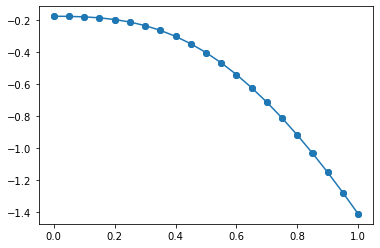

In [94]:
plt.plot(sorted_lam_vals, e_el_cpmd, '-o')

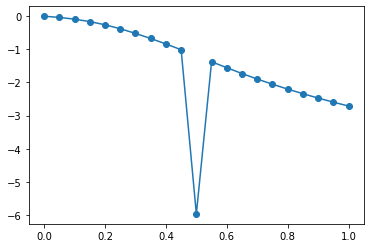

In [95]:
dE_dlam = []
ddlam = []
for i in range(0, len(sorted_lam_vals), 2):
    dE_dlam.append((e_el_cpmd[i+1]-e_el_cpmd[i])/(sorted_lam_vals[i+1]-sorted_lam_vals[i]))
    ddlam.append((sorted_lam_vals[i+1]+sorted_lam_vals[i])/2)
dE_dlam = np.array(dE_dlam)
ddlam = np.array(ddlam)
plt.plot(ddlam, dE_dlam, '-o')

In [96]:
-0.17884405--0.1788444

3.499999999823089e-07

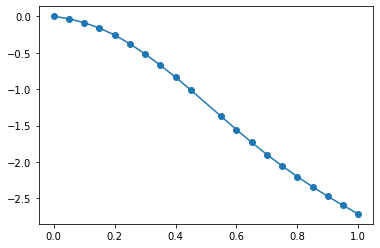

In [97]:
fixed_lam = np.concatenate((ddlam[:10], ddlam[11:]))

fixed_dE = np.concatenate((dE_dlam[:10], dE_dlam[11:]))

plt.plot(fixed_lam, fixed_dE, '-o')

In [182]:
def pick_derivative(lam, ddlam, dE_dlam):
    lam_val = ddlam[np.where(ddlam==lam)]
    dE_val = dE_dlam[np.where(lam == ddlam)]
    return(lam_val[0], dE_val[0])



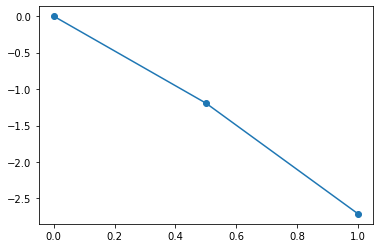

In [187]:
lam_vals_3 = []
dE_dlam_3 = []
for i in [0, 15, 30]:
    l, e = pick_derivative(ddlam[i], ddlam, dE_dlam)
    lam_vals_3.append(l)
    dE_dlam_3.append(e)
plt.plot(lam_vals_3, dE_dlam_3, '-o')

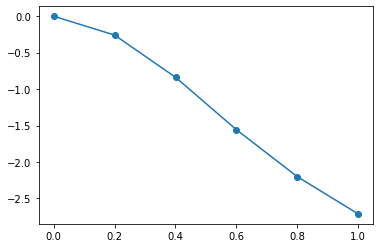

In [188]:
lam_vals_6 = []
dE_dlam_6 = []
for i in [0, 6, 12, 18, 24, 30]:
    l, e = pick_derivative(ddlam[i], ddlam, dE_dlam)
    lam_vals_6.append(l)
    dE_dlam_6.append(e)
plt.plot(lam_vals_6, dE_dlam_6, '-o')

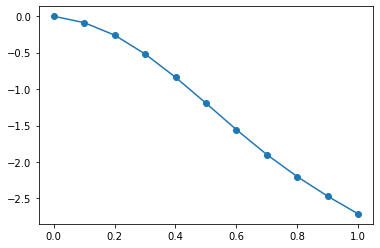

In [196]:
lam_vals_11 = []
dE_dlam_11 = []
for i in [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30]:
    l, e = pick_derivative(ddlam[i], ddlam, dE_dlam)
    lam_vals_11.append(l)
    dE_dlam_11.append(e)
plt.plot(lam_vals_11, dE_dlam_11, '-o')

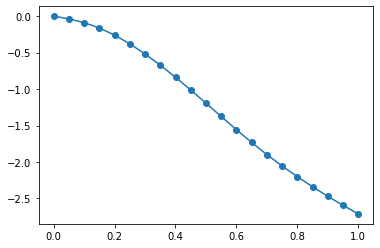

In [197]:
lam_vals_21 = []
dE_dlam_21 = []
for i in [0, 2, 3, 5, 6, 8, 9, 11, 12, 14, 15, 17, 18, 20, 21, 23, 24, 26, 27, 29, 30]:
    l, e = pick_derivative(ddlam[i], ddlam, dE_dlam)
    lam_vals_21.append(l)
    dE_dlam_21.append(e)
plt.plot(lam_vals_21, dE_dlam_21, '-o')

In [ ]:
-1.2549009999999965

In [198]:
E_int_3 = np.trapz(dE_dlam_3, x = lam_vals_3)
E_int_6 = np.trapz(dE_dlam_6, x = lam_vals_6)
E_int_11 = np.trapz(dE_dlam_11, x = lam_vals_11)
E_int_21 = np.trapz(dE_dlam_21, x = lam_vals_21)


In [67]:
E_exact = (e_el_cpmd[np.where(sorted_lam_vals == 1)][0]-e_el_cpmd[0])
print(E_exact)

-1.23555273


In [70]:
np.trapz(fixed_dE, x = fixed_lam)

-1.2361000000054068

In [200]:
N = [3, 6, 11, 21]
E_int = [E_int_3, E_int_6, E_int_11, E_int_21]

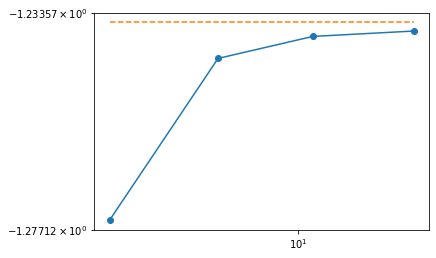

In [207]:
plt.plot(N, E_int, '-o')
plt.plot([N[0],N[-1]], [E_exact, E_exact], '--')
plt.yscale('symlog')
plt.xscale('symlog')

In [202]:
E_int_21-E_exact

-0.0017180200000279644

In [203]:
E_int_11-E_exact

-0.0028007700000223235